# Median and Bilateral Filters in OpenCV

In image processing, noise reduction is crucial, especially for underwater images where visibility is often compromised by particles, murkiness, and color distortions. Median and bilateral filters are two effective techniques for smoothing images while preserving important features like edges. Below are implementations of both filters using OpenCV in Python, along with explanations of how they work
### Median Filter (Not Ideal):

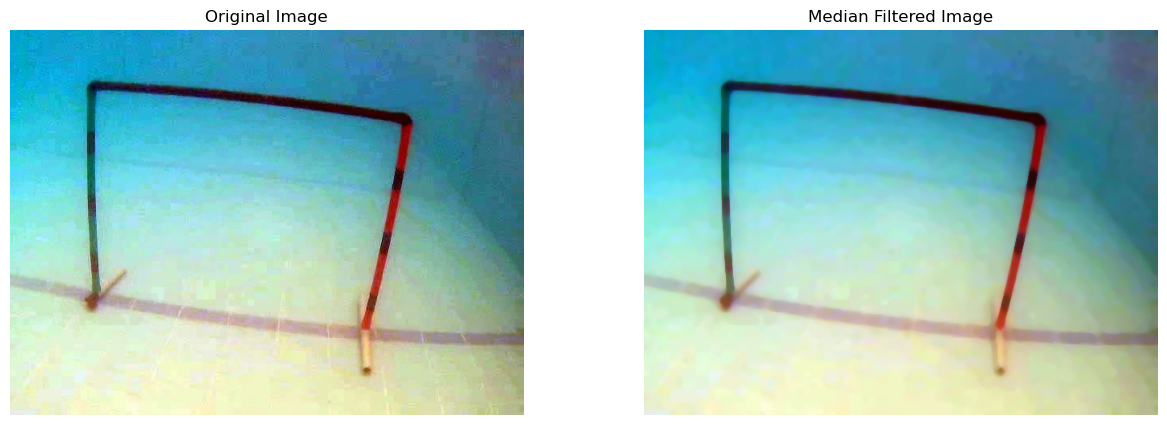

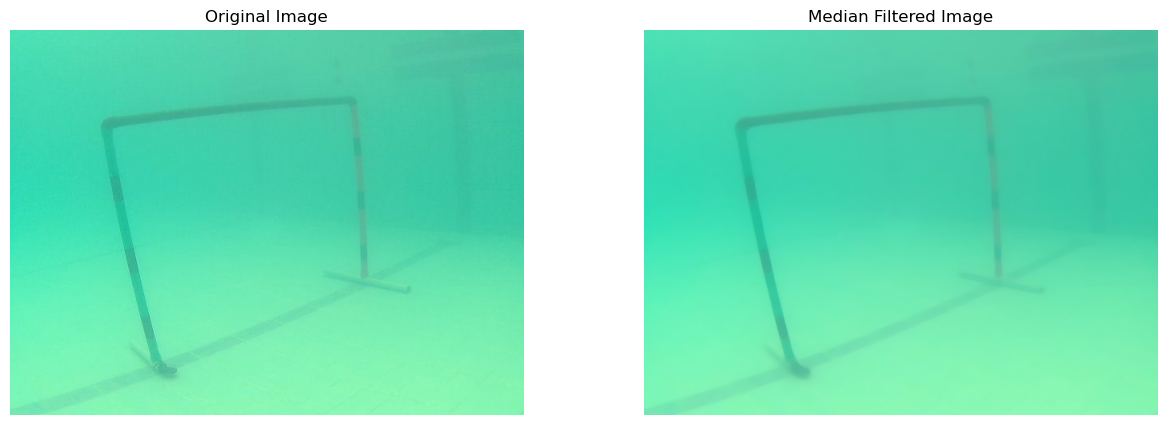

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def apply_median_filter(image, kernel_size=9):
    """
    Applies a median filter to the input image.

    Parameters:
        image (numpy.ndarray): The input image in BGR format.
        kernel_size (int): Size of the kernel (must be odd and greater than 1).

    Returns:
        numpy.ndarray: The median filtered image.
    """
    median_filtered = cv2.medianBlur(image, kernel_size)
    return median_filtered

def display_images(images, titles, cmap=None, figsize=(15, 5)):
    """
    Displays a list of images with corresponding titles.

    Parameters:
        images (list of numpy.ndarray): List of images to display.
        titles (list of str): List of titles corresponding to each image.
        cmap (str or None): Colormap to use (e.g., 'gray' for grayscale images).
        figsize (tuple): Size of the figure.
    """
    n_images = len(images)
    plt.figure(figsize=figsize)
    for i in range(n_images):
        plt.subplot(1, n_images, i + 1)
        # Convert image from BGR to RGB for correct color representation
        image_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb, cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# List of image filenames
image_files = ['frames/frame29.jpg', 'frame_007243.png']

# Process images
for idx, file in enumerate(image_files):
    image = cv2.imread(file)
    if image is not None:
        # Apply median filter
        median_filtered = apply_median_filter(image, kernel_size=9)

        # Display the original and filtered images
        display_images(
            images=[image, median_filtered],
            titles=['Original Image', 'Median Filtered Image']
        )
    else:
        print(f"Error: Unable to load {file}")

## How the Median Filter Works

The median filter is a non-linear digital filtering technique used to reduce noise, especially salt-and-pepper noise. It replaces each pixel’s value with the median of its neighboring pixels, including itself.
### Bilateral Filter: 

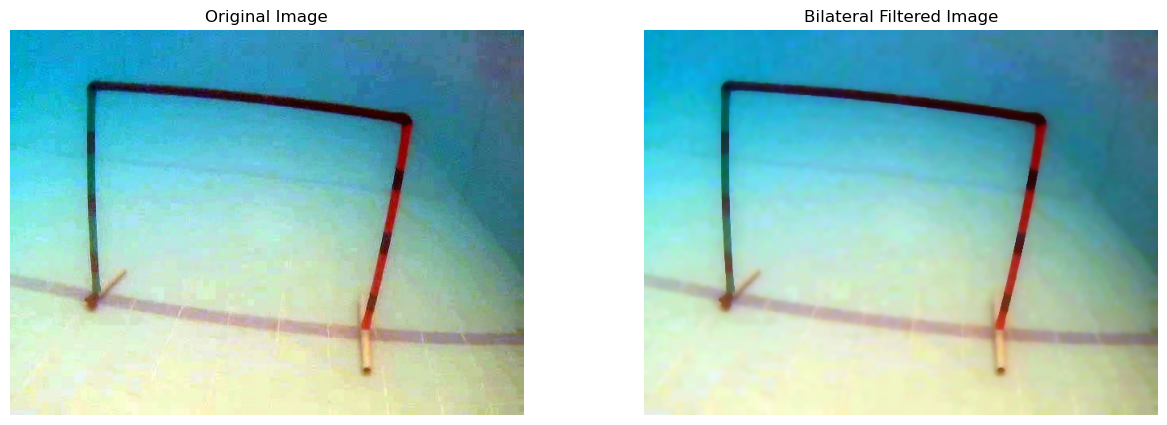

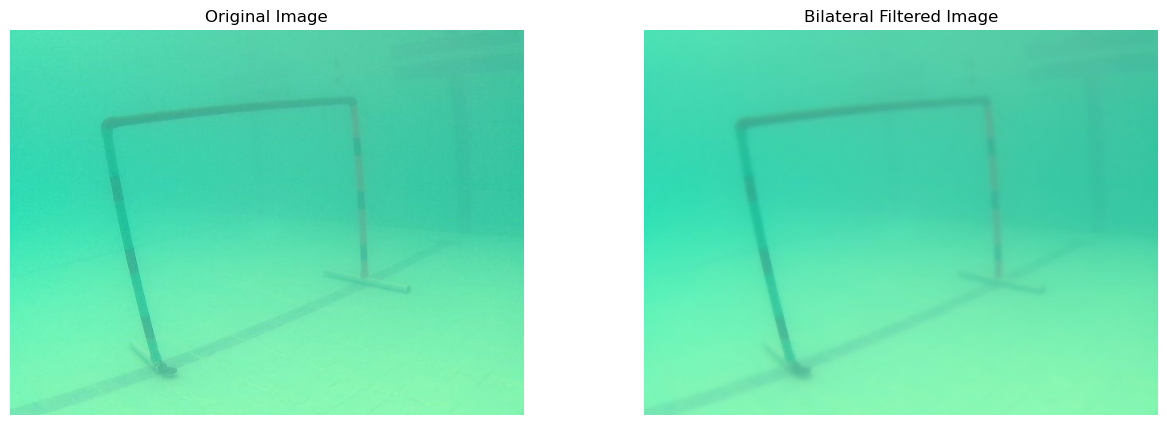

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def apply_bilateral_filter(image, diameter=13, sigma_color=175, sigma_space=175):
    """
    Applies a bilateral filter to the input image.

    Parameters:
        image (numpy.ndarray): The input image in BGR format.
        diameter (int): Diameter of each pixel neighborhood.
        sigma_color (float): Filter sigma in the color space.
        sigma_space (float): Filter sigma in the coordinate space.

    Returns:
        numpy.ndarray: The bilaterally filtered image.
    """
    bilateral_filtered = cv2.bilateralFilter(image, diameter, sigma_color, sigma_space)
    return bilateral_filtered

def display_images(images, titles, cmap=None, figsize=(15, 5)):
    """
    Displays a list of images with corresponding titles.

    Parameters:
        images (list of numpy.ndarray): List of images to display.
        titles (list of str): List of titles corresponding to each image.
        cmap (str or None): Colormap to use (e.g., 'gray' for grayscale images).
        figsize (tuple): Size of the figure.
    """
    n_images = len(images)
    plt.figure(figsize=figsize)
    for i in range(n_images):
        plt.subplot(1, n_images, i + 1)
        # Convert image from BGR to RGB for correct color representation
        image_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb, cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# List of image filenames
image_files = ['frames/frame29.jpg', 'frame_007243.png']
# Process images
for idx, file in enumerate(image_files):
    image = cv2.imread(file)
    if image is not None:
        # Apply bilateral filter
        bilateral_filtered = apply_bilateral_filter(
            image, diameter=9, sigma_color=75, sigma_space=75
        )

        # Display the original and filtered images
        display_images(
            images=[image, bilateral_filtered],
            titles=['Original Image', 'Bilateral Filtered Image']
        )
    else:
        print(f"Error: Unable to load {file}")

# CLAHE

Contrast Limited Adaptive Histogram Equalization (CLAHE) is an advanced version of Adaptive Histogram Equalization (AHE) that aims to prevent over-amplification of noise and reduce the occurrence of artifacts in images.

### Steps Involved

	1.	Color Space Conversion: Convert the image from BGR to LAB color space to operate on the luminance channel (L-channel), which controls the brightness of the image.
	2.	Applying CLAHE:
	•	Divide the Image: The image is divided into small blocks called tiles (e.g., 8x8 pixels).
	•	Histogram Equalization: Perform histogram equalization on each tile separately.
	•	Clip Limit: The contrast amplification in the vicinity of a given pixel value is limited to prevent noise amplification.
	•	Interpolation: The neighboring tiles are combined using bilinear interpolation to eliminate artificially induced boundaries.
	3.	Merge Channels: Merge the enhanced L-channel back with the original A and B channels.
	4.	Color Space Conversion: Convert the image back to the BGR color space.

Parameters

	•	Clip Limit (clip_limit): Threshold for contrast limiting. Higher values give more contrast.
	•	Tile Grid Size (tile_grid_size): Size of the grid for dividing the image. Smaller grids lead to more localized contrast enhancement.

Advantages

	•	Improved Contrast: Enhances local contrast and brings out more detail in the image.
	•	Noise Limitation: The contrast limiting prevents noise from being overly amplified.

Use Case in Underwater Imaging

	•	Visibility Enhancement: Underwater images often suffer from low contrast and poor visibility due to light absorption and scattering.
	•	Feature Enhancement: Improves the visibility of features such as the PVC gate, aiding in detection algorithms.

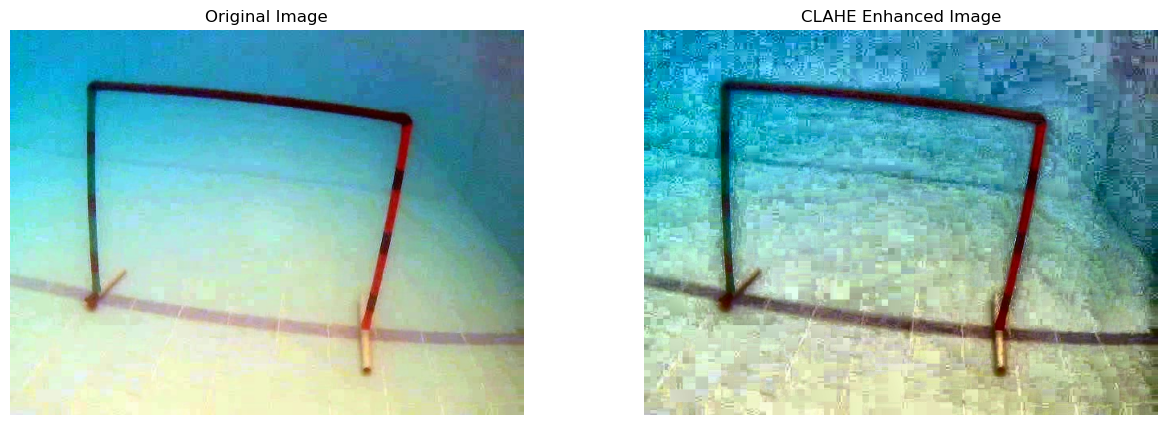

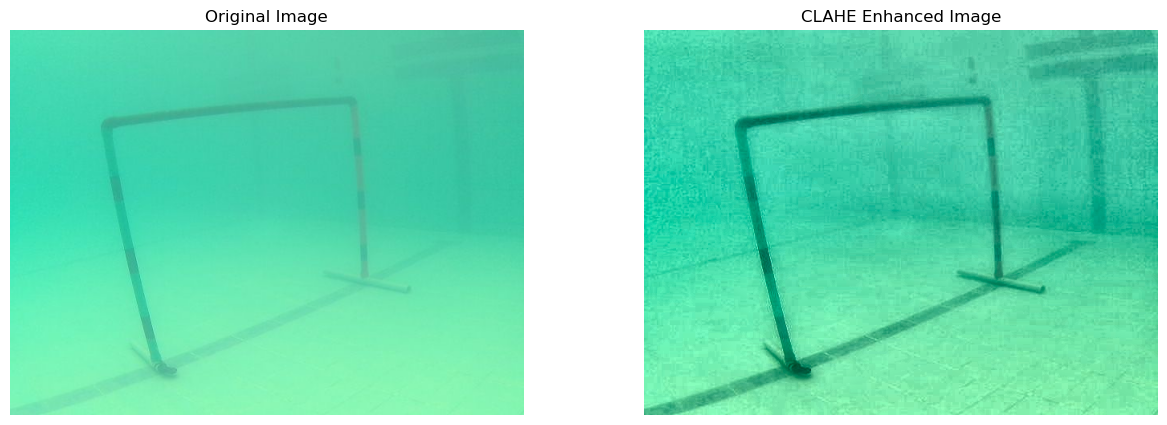

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    """
    Applies CLAHE to the input image.
    
    Parameters:
        image (numpy.ndarray): The input image in BGR format.
        clip_limit (float): Threshold for contrast limiting.
        tile_grid_size (tuple): Size of the grid for histogram equalization.
        
    Returns:
        numpy.ndarray: The image after applying CLAHE.
    """
    # Convert image to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    
    # Split the LAB image into its channels
    l_channel, a_channel, b_channel = cv2.split(lab_image)
    
    # Apply CLAHE to the L-channel
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    cl_l_channel = clahe.apply(l_channel)
    
    # Merge the CLAHE enhanced L-channel with the a and b channel
    merged_lab = cv2.merge((cl_l_channel, a_channel, b_channel))
    
    # Convert back to BGR color space
    enhanced_image = cv2.cvtColor(merged_lab, cv2.COLOR_LAB2BGR)
    
    return enhanced_image

def display_images(images, titles, cmap=None, figsize=(15, 5)):
    """
    Displays a list of images with corresponding titles.
    
    Parameters:
        images (list of numpy.ndarray): List of images to display.
        titles (list of str): List of titles corresponding to each image.
        cmap (str or None): Colormap to use (e.g., 'gray' for grayscale images).
        figsize (tuple): Size of the figure.
    """
    n_images = len(images)
    plt.figure(figsize=figsize)
    for i in range(n_images):
        plt.subplot(1, n_images, i + 1)
        # Convert image from BGR to RGB for correct color representation
        image_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb, cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# List of image filenames
image_files = ['frames/frame29.jpg', 'frame_007243.png']

# Process images
for idx, file in enumerate(image_files):
    image = cv2.imread(file)
    if image is not None:
        # Apply CLAHE
        enhanced_image = apply_clahe(image, clip_limit=5.0, tile_grid_size=(11, 11))
        
        # Display the original and enhanced images
        display_images(
            images=[image, enhanced_image],
            titles=['Original Image', 'CLAHE Enhanced Image']
        )
    else:
        print(f"Error: Unable to load {file}")